In [24]:
import pandas as pd

In [25]:
trn = pd.read_csv('BreastCancer_trn.csv')

In [26]:
tst = pd.read_csv('BreastCancer_tst.csv')

In [27]:
trn.head()

X0  X1  X2  X3  X4  X5  X6  X7  X8          y
0   3   1   1   1   3   2   1   1   1     benign
1   5   1   3   1   2   1   2   1   1     benign
2   7   5   6  10   4  10   5   3   1  malignant
3   1   1   1   3   1   3   1   1   1     benign
4   2   1   1   1   3   1   2   1   1     benign

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
X_trn = trn.filter(regex='\d')

In [30]:
y_trn = trn.y

In [31]:
X_tst = tst.filter(regex='\d')

In [32]:
y_tst = tst.y

In [33]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_trn, y_trn)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
import warnings
warnings.filterwarnings("ignore")

param = range(3, 15, 2)

grid = GridSearchCV(knn, {'n_neighbors': param})

best_knn = grid.fit(X_trn, y_trn).best_estimator_

best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

In [36]:
import matplotlib.pyplot as plt

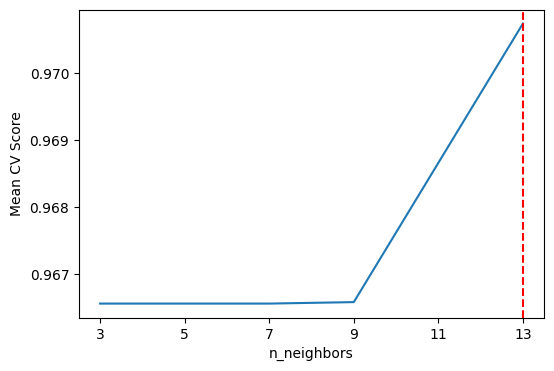

In [37]:
plt.figure(figsize=(6,4))

plt.plot(param, grid.cv_results_['mean_test_score'])
    
plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_neighbors')

plt.axvline(
    x=best_knn.n_neighbors,
    color='red',
    ls='--')

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

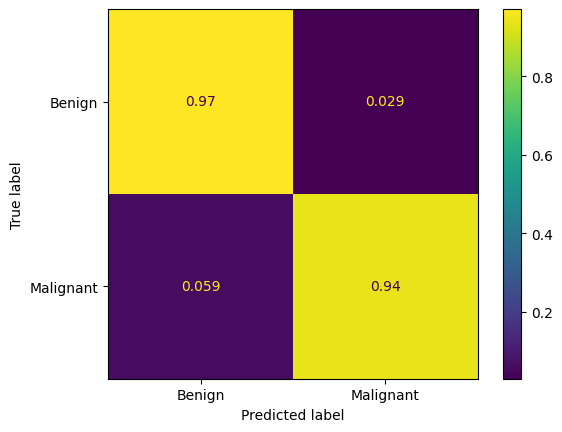

In [39]:
import matplotlib.pyplot as plt
spam = ['Benign', 'Malignant']
ConfusionMatrixDisplay.from_estimator(
    estimator=best_knn,
    X=X_tst,
    y=y_tst,
    display_labels=spam,
    normalize='true')
    

In [40]:
print('Accuracy on training data: '+ str("{:.2%}".format(knn.score(X_trn, y_trn))))

Accuracy on training data: 97.91%


In [41]:
print('Accuracy on testing data: '+ str("{:.2%}".format(best_knn.score(X_tst, y_tst))))

Accuracy on testing data: 96.10%
